In [3]:
!pip install scikit-plot

In [4]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [5]:
from scikitplot.metrics import plot_roc_curve

In [6]:
columns=['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',names=columns,header=None)
df.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.shape

(214, 11)

In [9]:
df.columns

Index(['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'glass_type'],
      dtype='object')

In [10]:
df.isnull().sum()

#there are no null values in the set

Id_number     0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

In [11]:
df.describe()

#the mean and std are not in goog relation that means there are outliers

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# EDA

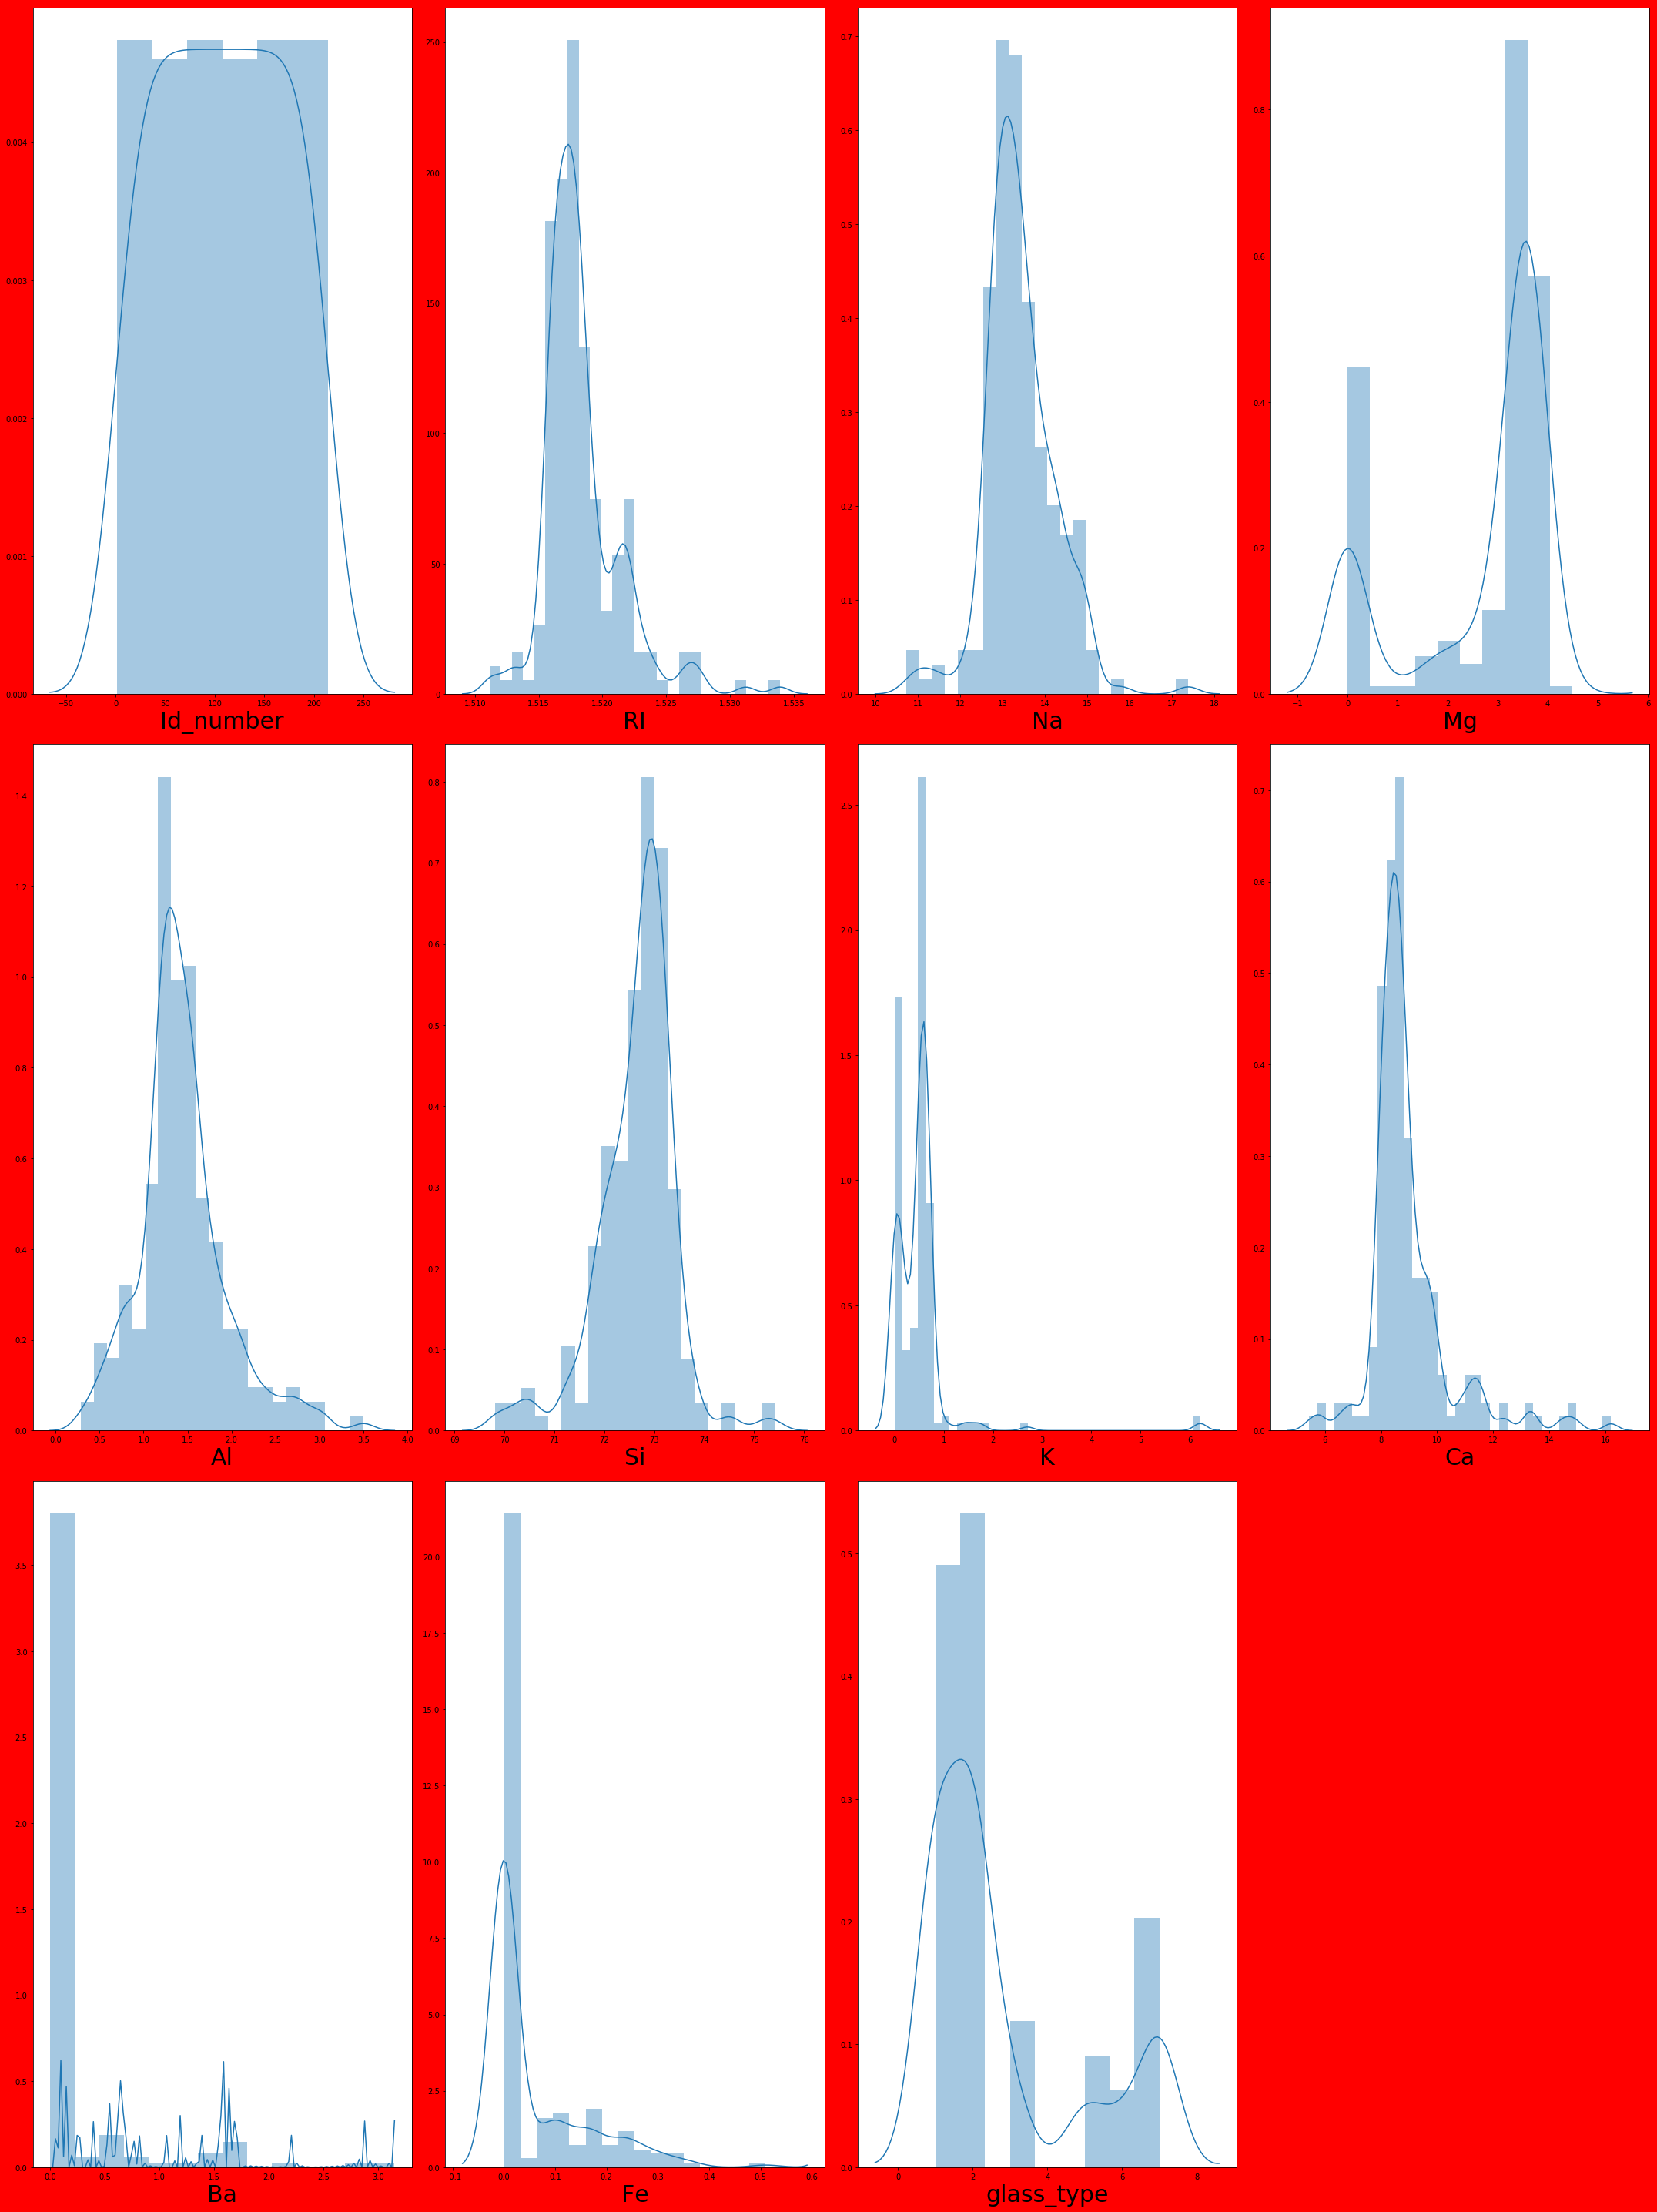

In [12]:
plt.figure(figsize=(30,40),facecolor='red')
plotnumber= 1

for column in df:
    if plotnumber <= 11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=30)
        
    
        
    plotnumber+=1
plt.tight_layout()

In [13]:
#THE above graph shows the skewness of data

In [14]:
X=df.drop(['glass_type','Id_number'],axis=1)
y=df['glass_type']

In [15]:
X

#taking only the features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


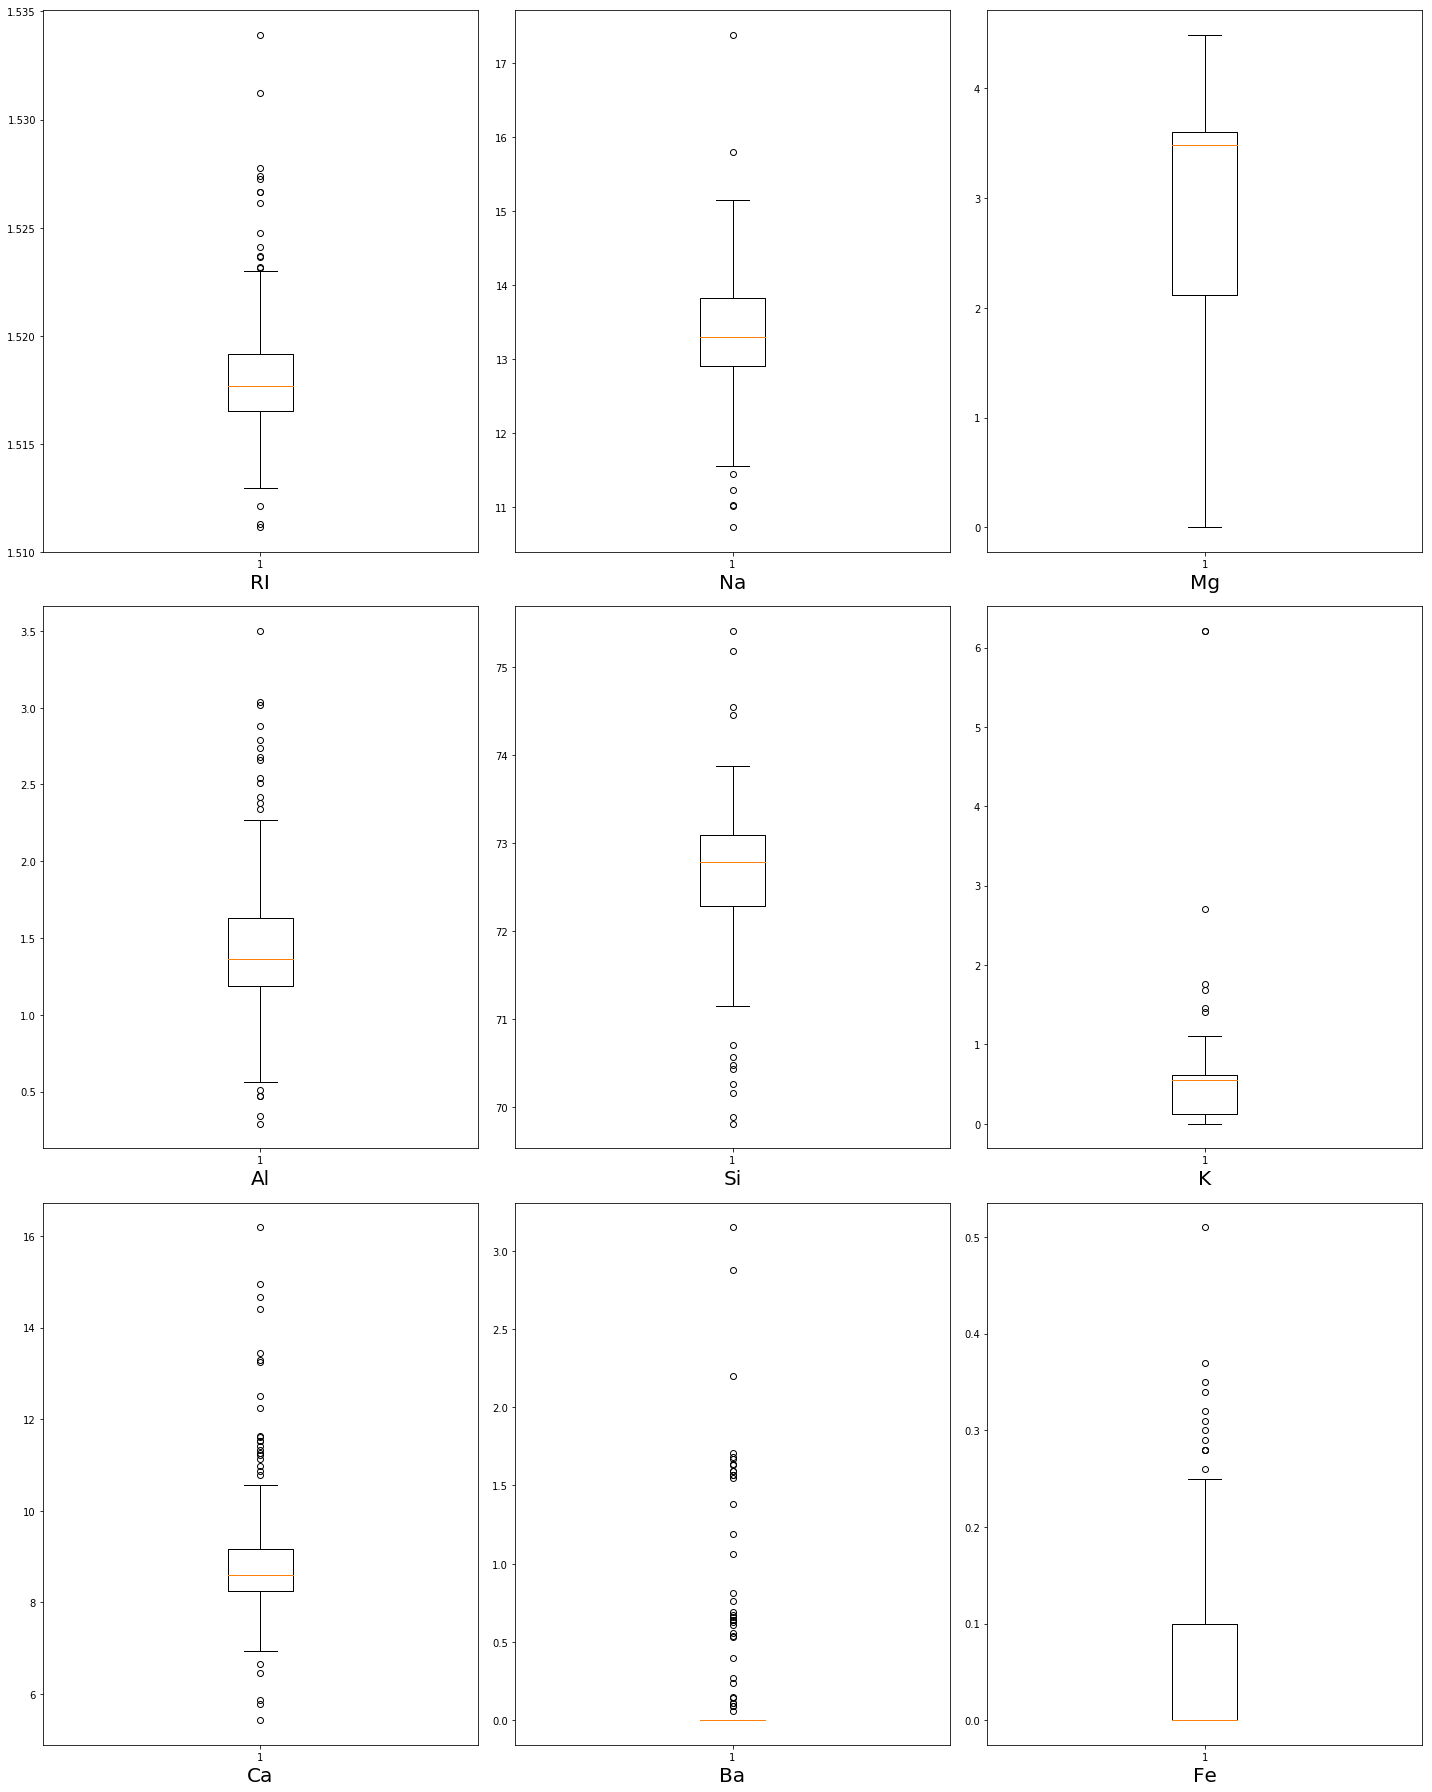

In [16]:
#plotting the graph to check outliers

plt.figure(figsize=(20,25),facecolor='white')
plotnumber= 1

for column in X:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        plt.boxplot(X[column])
        plt.xlabel(column,fontsize=20)
        
        
        
    plotnumber+=1
plt.tight_layout()

In [17]:


#1st quantile
q1=df.quantile(0.25)

#3rd quantile
q3=df.quantile(0.75)

iqr=q3 - q1

In [18]:
#TREATING THE OUTLIERS IN THE DATA

In [19]:
ri_high=(q3.RI + (1.5 *iqr.RI))
ri_high

1.52311

In [20]:
index=np.where(df['RI']> ri_high)
index

(array([ 47,  50, 103, 104, 105, 106, 107, 110, 111, 112, 131, 170, 187,
        189], dtype=int64),)

In [21]:
df=df.drop(df.index[index])
df.shape

(200, 11)

In [22]:
df.reset_index()

,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
196,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
197,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
198,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [23]:
na_high=(q3.Na + (1.5 *iqr.Na))
print(na_high)


index=np.where(df['Na']> na_high)
print(index)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

15.201249999999998
(array([172], dtype=int64),)
(199, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
194,209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
195,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
196,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
197,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [24]:
al_high=(q3.Al+ (1.5 *iqr.Al))
print(al_high)


index=np.where(df['Al']> al_high)
print(index)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

2.29
(array([152, 159, 160, 176, 177, 180, 181, 182, 183, 184, 187, 193, 194],
      dtype=int64),)
(186, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
181,207,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
182,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
183,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
184,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [25]:
si_high=(q3.Si+ (1.5 *iqr.Si))
print(si_high)


index=np.where(df['Al']> si_high)
print(index)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

74.29875000000001
(array([], dtype=int64),)
(186, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
181,207,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
182,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
183,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
184,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [26]:
k_high=(q3.K+ (1.5 *iqr.K))
print(k_high)


index=np.where(df['K']> k_high)
print(index)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

1.34125
(array([169, 170, 176, 181], dtype=int64),)
(182, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
177,206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
178,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
179,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
180,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [27]:
ca_high=(q3.Ca+ (1.5 *iqr.Ca))
print(ca_high)


index=np.where(df['Ca']> ca_high)
print(index)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

10.57125
(array([101, 102, 120, 153, 154, 155, 157, 158, 160, 167, 168], dtype=int64),)
(171, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
166,206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
167,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
168,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
169,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [28]:
ba_high=(q3.Ba+ (1.5 *iqr.Ba))
print(ca_high)


index=np.where(df['Ba']> ba_high)
print(index)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

10.57125
(array([ 32,  36,  59,  97,  98, 116, 127, 128, 147, 151, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170], dtype=int64),)
(149, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
144,178,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
145,179,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
146,180,181,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0,6
147,181,182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6


In [29]:
fe_high=(q3.Fe+ (1.5 *iqr.Fe))
print(fe_high)


index=np.where(df['Fe']> fe_high)
print(index)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

0.25
(array([  5,  42,  52,  66, 101, 115, 123, 139], dtype=int64),)
(141, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
136,178,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
137,179,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
138,180,181,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0,6
139,181,182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6


In [30]:
ri_low=(q1.RI - (1.5 *iqr.RI))
print(ri_low)

index=np.where(df['RI'] <ri_low)
print(index)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

1.5125700000000002
(array([], dtype=int64),)
(141, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
136,178,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
137,179,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
138,180,181,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0,6
139,181,182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6


In [31]:
na_low=(q1.Na - (1.5 *iqr.Na))
print(na_low)

index=np.where(df['Na'] <na_low)
print(index)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

11.531250000000004
(array([], dtype=int64),)
(141, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
136,178,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
137,179,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
138,180,181,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0,6
139,181,182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6


In [32]:
al_low=(q1.Al - (1.5 *iqr.Al))
print(al_low)

index=np.where(df['Al'] <al_low)
print(index)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

0.53
(array([20, 35, 36], dtype=int64),)
(138, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
133,178,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
134,179,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
135,180,181,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0,6
136,181,182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6


In [33]:
si_low=(q1.Si - (1.5 *iqr.Si))
print(si_low)

index=np.where(df['Si'] <si_low)
print(index)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

71.06875
(array([137], dtype=int64),)
(137, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
132,177,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
133,178,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
134,179,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
135,180,181,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0,6


In [34]:
ca_low=(q1.Ca - (1.5 *iqr.Ca))
print(ca_low)

index=np.where(df['Ca'] <ca_low)
print(index)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

6.841250000000001
(array([], dtype=int64),)
(137, 11)


,index,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
132,177,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
133,178,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
134,179,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
135,180,181,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0,6


In [35]:
df.shape

(137, 11)

Durin removing outliers we removed certain rows and have new set of rows now

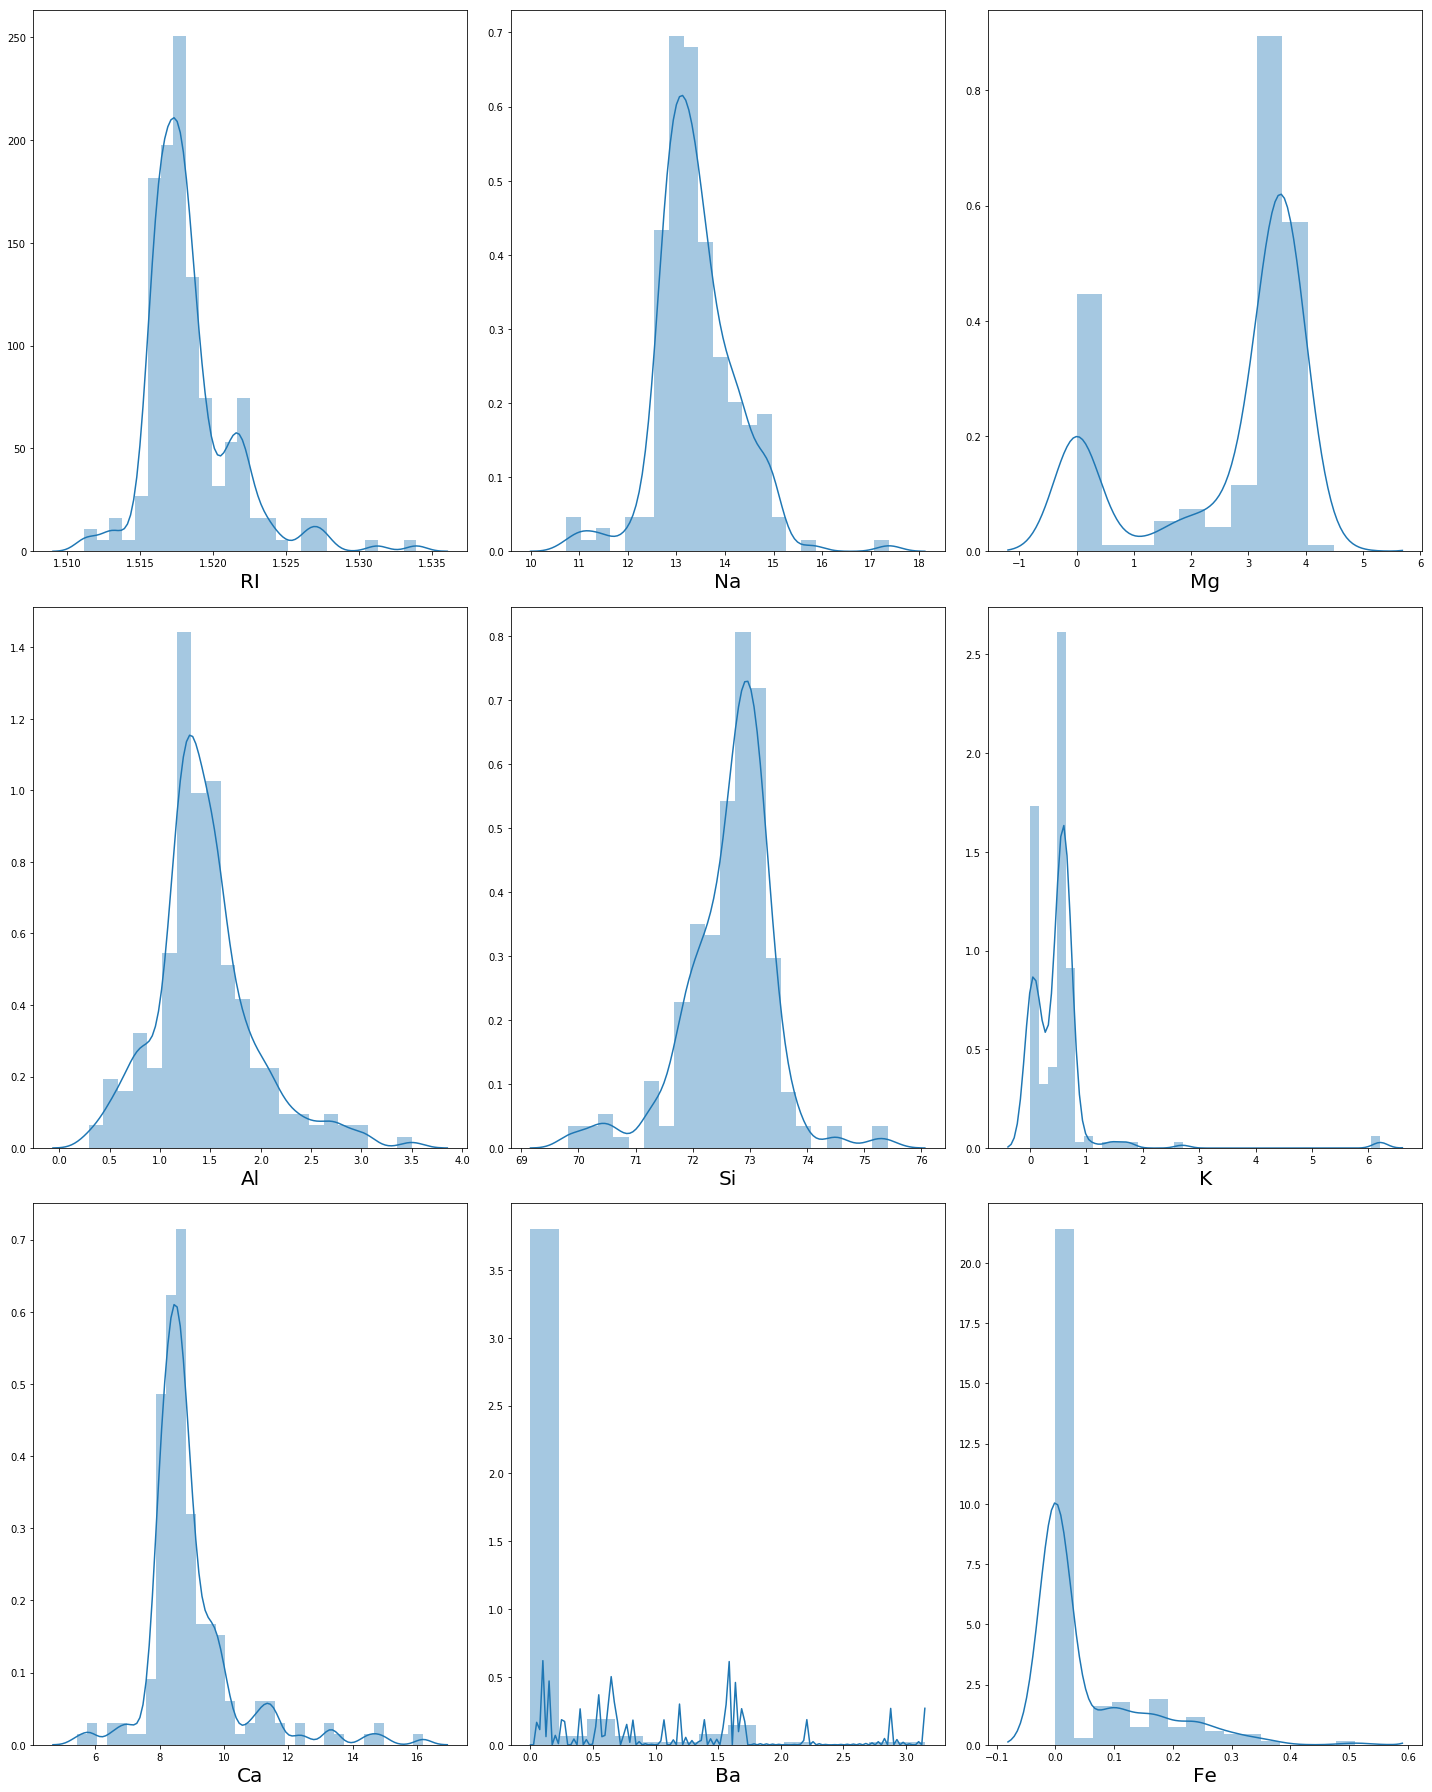

In [36]:
#THE GRAPH SHOWS THAT SKEWNESS IS FIXED

plt.figure(figsize=(20,25),facecolor='white')
plotnumber= 1

for column in X:
    if plotnumber <= 9: 
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

In [37]:
#assinging variables to separate features and columns

X=df.drop(columns=['glass_type','Id_number'])
y=df['glass_type']

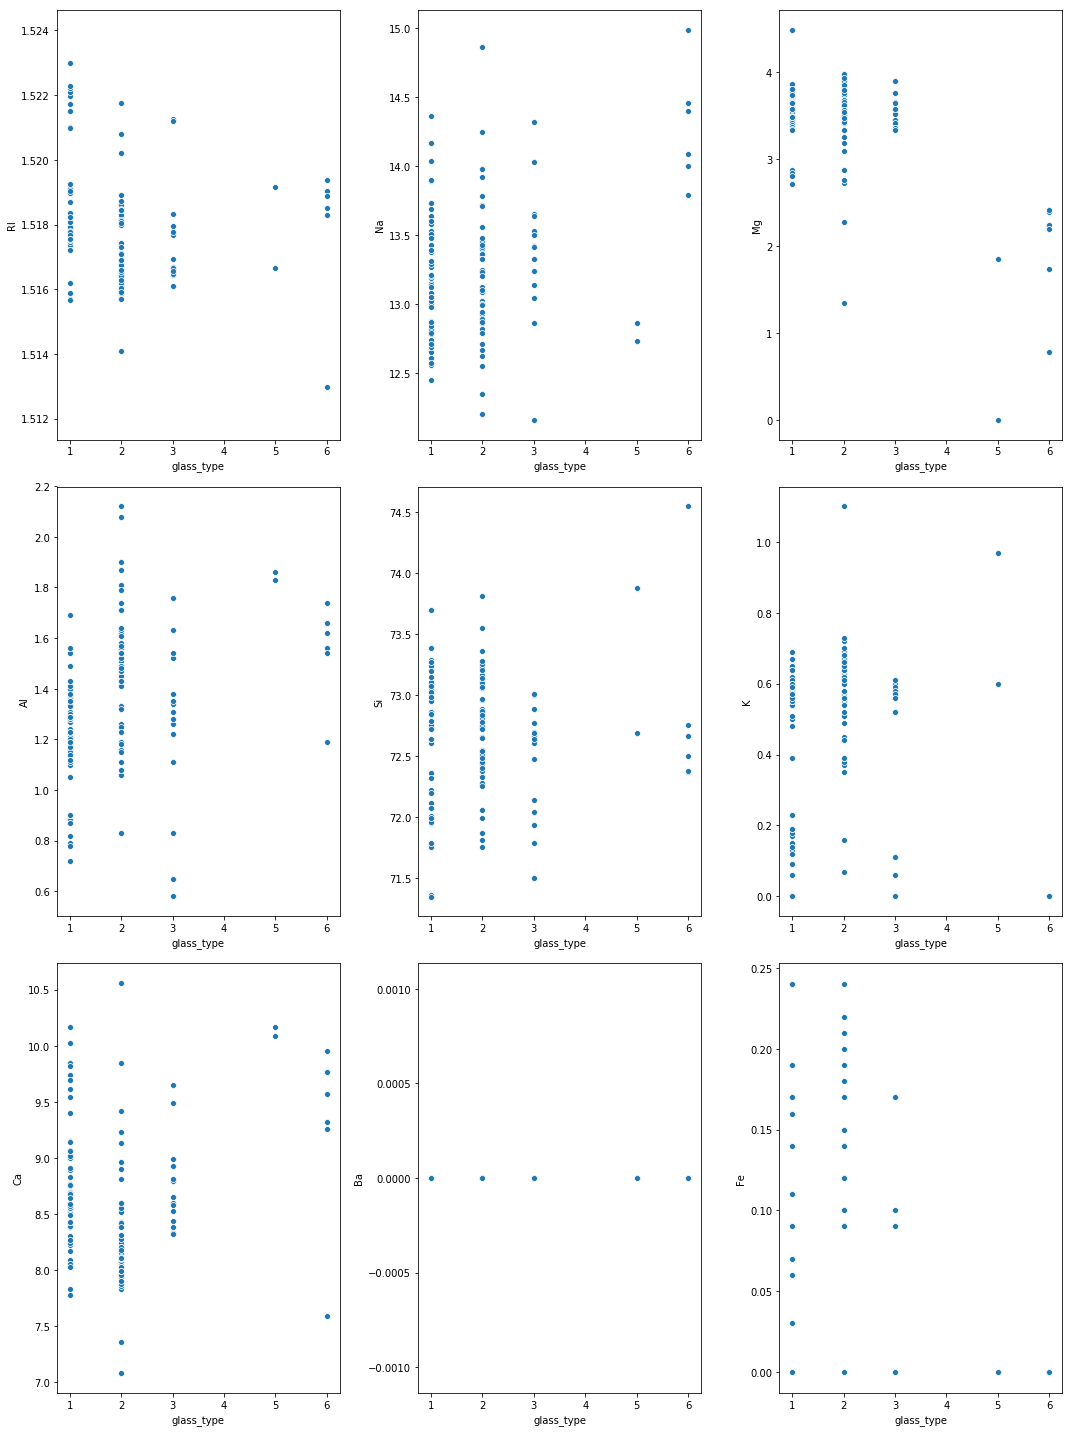

In [38]:
#PLOTTING GRAPH TO SEE THE RELATION BETWEEN FEATURES AND LABEL

plt.figure(figsize=(15,20))
plotnumber= 1

for column in X:
    if plotnumber <= 9: #as there are 9 coloumns
        ax=plt.subplot(3,3,plotnumber)
        sns.scatterplot(y,X[column])
        
        
        
    plotnumber+=1
plt.tight_layout()

In [39]:
#as per the scatter graph element Ba has zero effect in the glass_type

In [40]:
#checking the correlation

df.corr()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
Id_number,1.000000,-0.078734,0.242262,-0.378930,0.244192,-0.091189,-0.143817,0.150788,NaN,-0.033531,0.817867
RI,-0.078734,1.000000,0.244108,0.098295,-0.629500,-0.655691,-0.542162,0.766791,NaN,0.061186,-0.158596
Na,0.242262,0.244108,1.000000,-0.165184,-0.061572,-0.565951,-0.582984,0.111161,NaN,-0.181628,0.364189
Mg,-0.378930,0.098295,-0.165184,1.000000,-0.366544,-0.256060,0.058382,-0.416242,NaN,-0.028788,-0.614192
Al,0.244192,-0.629500,-0.061572,-0.366544,1.000000,0.231746,0.464156,-0.448802,NaN,-0.060391,0.331682
Si,-0.091189,-0.655691,-0.565951,-0.256060,0.231746,1.000000,0.373691,-0.384601,NaN,0.041325,0.053111
K,-0.143817,-0.542162,-0.582984,0.058382,0.464156,0.373691,1.000000,-0.498953,NaN,0.019539,-0.281697
Ca,0.150788,0.766791,0.111161,-0.416242,-0.448802,-0.384601,-0.498953,1.000000,NaN,0.143452,0.176711
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,-0.033531,0.061186,-0.181628,-0.028788,-0.060391,0.041325,0.019539,0.143452,NaN,1.000000,-0.142824


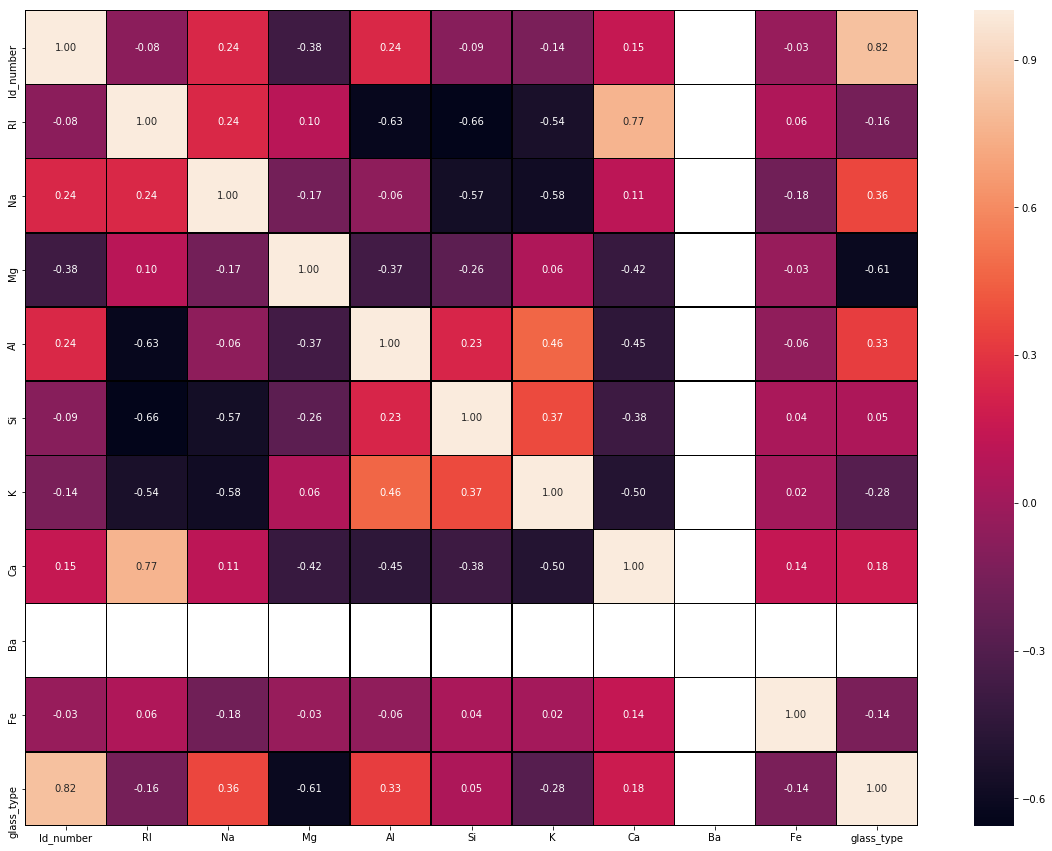

In [41]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [42]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [43]:
X_scaled.shape

(137, 9)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

vif['Features']=X.columns

vif

,vif,Features
0,6.811178,RI
1,20.990000,Na
2,32.623386,Mg
3,9.813477,Al
4,22.869410,Si
5,6.668179,K
6,45.127045,Ca
7,NaN,Ba
8,1.068290,Fe


In [46]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0


In [47]:
X=df.drop(columns=['glass_type','Id_number','Ba'])
y=df['glass_type']

#dropping column of Ba as well as it has zero correlation with the label

In [48]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)

In [49]:
#intialising the model

log_reg=LogisticRegression()


In [50]:
#traing the model with train data
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
def metric_score (clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n ++++++++++++++ train result is++++++++++++ ')
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
        
    elif train ==False:
        pred=clf.predict(x_test)
        print('\n ++++++++++++++ test result is++++++++++++ ')
        print(f"Accuracy Score: {accuracy_score(y_test, pred) *100:.2f}%")
        
        print ('\n \n Test classification report \n',classification_report(y_test,pred, digits=2))

In [52]:
metric_score(log_reg,x_train,x_test,y_train,y_test,train=True)
metric_score(log_reg,x_train,x_test,y_train,y_test,train=False)


 ++++++++++++++ train result is++++++++++++ 
Accuracy Score: 67.65%

 ++++++++++++++ test result is++++++++++++ 
Accuracy Score: 54.29%

 
 Test classification report 
               precision    recall  f1-score   support

           1       0.73      0.58      0.65        19
           2       0.42      0.67      0.52        12
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0

   micro avg       0.54      0.54      0.54        35
   macro avg       0.23      0.25      0.23        35
weighted avg       0.54      0.54      0.53        35



# Hyperparmeter Tuning

In [53]:
param_grid = [    
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [54]:
clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [55]:
clf.fit(x_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 1049 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'penalty': ['l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 1000, 2500, 5000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [56]:
print('best_params ==>',clf.best_estimator_)

best_params ==> LogisticRegression(C=78.47599703514607, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)


In [57]:
log_reg=clf.best_estimator_

In [58]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=78.47599703514607, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [59]:
metric_score(log_reg,x_train,x_test,y_train,y_test,train=True)
metric_score(log_reg,x_train,x_test,y_train,y_test,train=False)


 ++++++++++++++ train result is++++++++++++ 
Accuracy Score: 78.43%

 ++++++++++++++ test result is++++++++++++ 
Accuracy Score: 54.29%

 
 Test classification report 
               precision    recall  f1-score   support

           1       0.71      0.53      0.61        19
           2       0.42      0.67      0.52        12
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         1

   micro avg       0.54      0.54      0.54        35
   macro avg       0.53      0.55      0.53        35
weighted avg       0.56      0.54      0.53        35



In [ ]:
#the accuracy score remains the same after hyperparameter tuning

# INtialising a new model

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rdm_clf=RandomForestClassifier()

In [62]:
rdm_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
metric_score(rdm_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(rdm_clf,x_train,x_test,y_train,y_test,train=False)


 ++++++++++++++ train result is++++++++++++ 
Accuracy Score: 98.04%

 ++++++++++++++ test result is++++++++++++ 
Accuracy Score: 68.57%

 
 Test classification report 
               precision    recall  f1-score   support

           1       0.82      0.74      0.78        19
           2       0.56      0.83      0.67        12
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        35
   macro avg       0.34      0.39      0.36        35
weighted avg       0.64      0.69      0.65        35



In [ ]:
#THE train and test score improved under randomforestclasssifier

# INtialising a new model

In [64]:
dt=DecisionTreeClassifier()

In [65]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)


 ++++++++++++++ train result is++++++++++++ 
Accuracy Score: 100.00%

 ++++++++++++++ test result is++++++++++++ 
Accuracy Score: 68.57%

 
 Test classification report 
               precision    recall  f1-score   support

           1       0.87      0.68      0.76        19
           2       0.56      0.75      0.64        12
           3       0.33      0.33      0.33         3
           5       1.00      1.00      1.00         1

   micro avg       0.69      0.69      0.69        35
   macro avg       0.69      0.69      0.69        35
weighted avg       0.72      0.69      0.69        35



# INtialising a new model

In [67]:
knn=KNeighborsClassifier()

In [68]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


 ++++++++++++++ train result is++++++++++++ 
Accuracy Score: 74.51%

 ++++++++++++++ test result is++++++++++++ 
Accuracy Score: 65.71%

 
 Test classification report 
               precision    recall  f1-score   support

           1       0.71      0.79      0.75        19
           2       0.62      0.67      0.64        12
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0

   micro avg       0.66      0.66      0.66        35
   macro avg       0.27      0.29      0.28        35
weighted avg       0.60      0.66      0.63        35



In [ ]:
#the accuracy score is less than decision tree and random forest classifier but more than logistic regression